# This is data exploration tutorial of 911 calls from Kaggle

In [1]:
#lets us start with importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Lets import our data from 911.csv file and look through it

In [2]:
dataset = pd.read_csv('911.csv')

In [5]:
dataset.info()
dataset.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 17:40:01,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 17:40:01,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 17:40:01,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:40:01,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


#### So here we have 99492 rows and 9 columns. 

#### Let us see the data which is not useful 1.Latitude 2. Longitude 3. e(all values are 1)

### Let us explore the data for maximum points

In [6]:
# starting from zip the maximum calls from zip
dataset['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [7]:
# This shows that 19401 is the area where we get maximum emergencies. So this area requires special considerations

In [9]:
# Let us see the towns since we have two parameters town and zip and they have different affect
dataset['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [10]:
# This shows Lower Merion get the maximum emergencies 

#### Let us see the unique title of emergencies we get

In [11]:
dataset['title'].nunique()

110

### Very important part, now we are giong to create new columns which will eventually clean tour data and better insights

In [15]:
# So we have total 110 unique titles for emergencies and as we can see we have main 3 categories a)EMS b)Fire c)Traffic
dataset['Reasons'] = dataset['title'].apply(lambda x: x.split(':')[0])

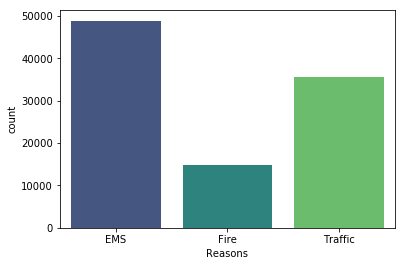

In [22]:
# Lets get insight of Reasons data set 
sns.countplot(x='Reasons',data=dataset, palette='viridis')

In [23]:
# We can see that EMS is the highest reason for calls.
# So govt. need more consideration on EMS

In [24]:
# Now we have another very important data available, its the timing which includes year, month, day etc. But its datatype is
#       important. Let us check it out first
type(dataset['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [25]:
#Since its a string we can't manipultate it. Rather we will use pd.to_datetime and further calling its methods
dataset['timeStamp'] = pd.to_datetime(dataset['timeStamp'])
type(dataset['timeStamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [34]:
# Let us make new categorical data hour,month, dayofweek
dataset['Month']= dataset['timeStamp'].apply(lambda time: time.month)
dataset['Hour']= dataset['timeStamp'].apply(lambda time: time.hour)
dataset['Day of Week']= dataset['timeStamp'].apply(lambda time: time.dayofweek)

In [35]:
dataset['Day of Week']

0        3
1        3
2        3
3        3
4        3
5        3
6        3
7        3
8        3
9        3
10       3
11       3
12       3
13       3
14       3
15       3
16       3
17       3
18       3
19       3
20       3
21       3
22       3
23       3
24       3
25       3
26       3
27       3
28       3
29       3
        ..
99462    2
99463    2
99464    2
99465    2
99466    2
99467    2
99468    2
99469    2
99470    2
99471    2
99472    2
99473    2
99474    2
99475    2
99476    2
99477    2
99478    2
99479    2
99480    2
99481    2
99482    2
99483    2
99484    2
99485    2
99486    2
99487    2
99488    2
99489    2
99490    2
99491    2
Name: Day of Week, Length: 99492, dtype: int64

In [36]:
# Here you can see we have numeric day of week which is not desirable so we will use map funtion to make it into other form
dmap = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [37]:
dataset['Day of Week'] = dataset['Day of Week'].map(dmap)
dataset['Day of Week']

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
5         Thursday
6         Thursday
7         Thursday
8         Thursday
9         Thursday
10        Thursday
11        Thursday
12        Thursday
13        Thursday
14        Thursday
15        Thursday
16        Thursday
17        Thursday
18        Thursday
19        Thursday
20        Thursday
21        Thursday
22        Thursday
23        Thursday
24        Thursday
25        Thursday
26        Thursday
27        Thursday
28        Thursday
29        Thursday
           ...    
99462    Wednesday
99463    Wednesday
99464    Wednesday
99465    Wednesday
99466    Wednesday
99467    Wednesday
99468    Wednesday
99469    Wednesday
99470    Wednesday
99471    Wednesday
99472    Wednesday
99473    Wednesday
99474    Wednesday
99475    Wednesday
99476    Wednesday
99477    Wednesday
99478    Wednesday
99479    Wednesday
99480    Wednesday
99481    Wednesday
99482    Wednesday
99483    Wed

In [38]:
# So now we have sorted data set, let us again see it
dataset.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Month,Hour,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,Thursday


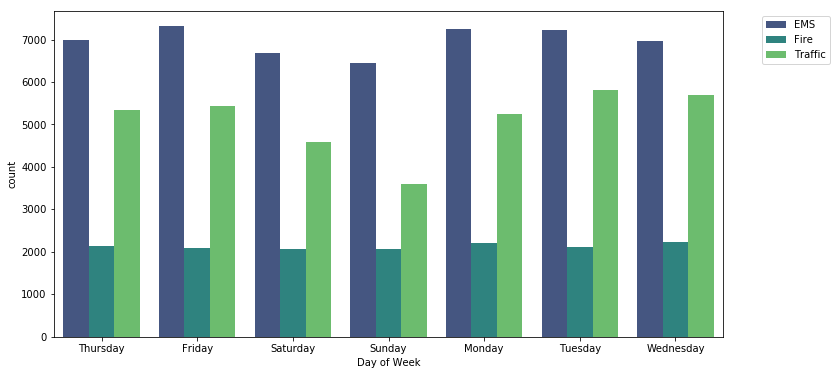

In [49]:
# let us plot the data we got
plt.figure(figsize=(12,6))
sns.countplot(x='Day of Week', data=dataset, hue='Reasons',palette='viridis')
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
# We have Maximum calls on EMS on Friday

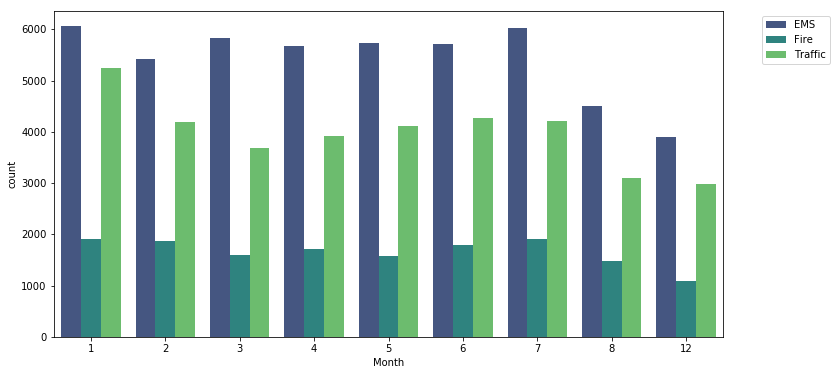

In [53]:
# Let us plot for month
plt.figure(figsize=(12,6))
sns.countplot(x='Month',data=dataset, hue='Reasons', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [55]:
# There are 2 obeservations a) Maximum again EMS on January b)We donot have 9,10,11 months
# Let us figure it out by grouping 
byMonth = dataset.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


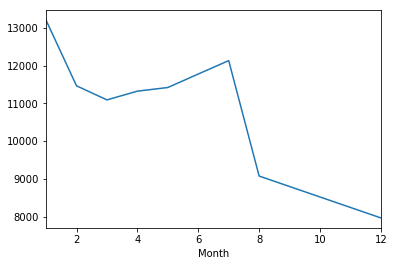

In [56]:
# Let us plot the month data set by line plot to get a rough estimate of what 9,10,11 months
byMonth['twp'].plot()

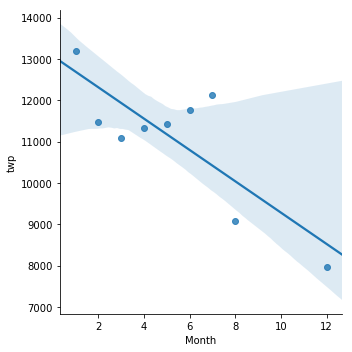

In [57]:
# or may be we can use lmplot to create linea fit. Let us see it using Linear Regression
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [59]:
# So now we have linear regression curve to get rough estimate of our month and calls

### After Month, Day, Hour now let us go for dates

In [60]:
dataset['Date'] = dataset['timeStamp'].apply(lambda x: x.date)
# Here we are using the same approach as we did  for hour and month. But it won't work, let us see

In [62]:
dataset['Date']

0        <built-in method date of Timestamp object at 0...
1        <built-in method date of Timestamp object at 0...
2        <built-in method date of Timestamp object at 0...
3        <built-in method date of Timestamp object at 0...
4        <built-in method date of Timestamp object at 0...
5        <built-in method date of Timestamp object at 0...
6        <built-in method date of Timestamp object at 0...
7        <built-in method date of Timestamp object at 0...
8        <built-in method date of Timestamp object at 0...
9        <built-in method date of Timestamp object at 0...
10       <built-in method date of Timestamp object at 0...
11       <built-in method date of Timestamp object at 0...
12       <built-in method date of Timestamp object at 0...
13       <built-in method date of Timestamp object at 0...
14       <built-in method date of Timestamp object at 0...
15       <built-in method date of Timestamp object at 0...
16       <built-in method date of Timestamp object at 0.

In [63]:
# So we need to do it as
dataset['Date'] = dataset['timeStamp'].apply(lambda x: x.date())
dataset['Date']
#Perfecto!

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
5        2015-12-10
6        2015-12-10
7        2015-12-10
8        2015-12-10
9        2015-12-10
10       2015-12-10
11       2015-12-10
12       2015-12-10
13       2015-12-10
14       2015-12-10
15       2015-12-10
16       2015-12-10
17       2015-12-10
18       2015-12-10
19       2015-12-10
20       2015-12-10
21       2015-12-10
22       2015-12-10
23       2015-12-10
24       2015-12-10
25       2015-12-10
26       2015-12-10
27       2015-12-10
28       2015-12-10
29       2015-12-10
            ...    
99462    2016-08-24
99463    2016-08-24
99464    2016-08-24
99465    2016-08-24
99466    2016-08-24
99467    2016-08-24
99468    2016-08-24
99469    2016-08-24
99470    2016-08-24
99471    2016-08-24
99472    2016-08-24
99473    2016-08-24
99474    2016-08-24
99475    2016-08-24
99476    2016-08-24
99477    2016-08-24
99478    2016-08-24
99479    2016-08-24
99480    2016-08-24


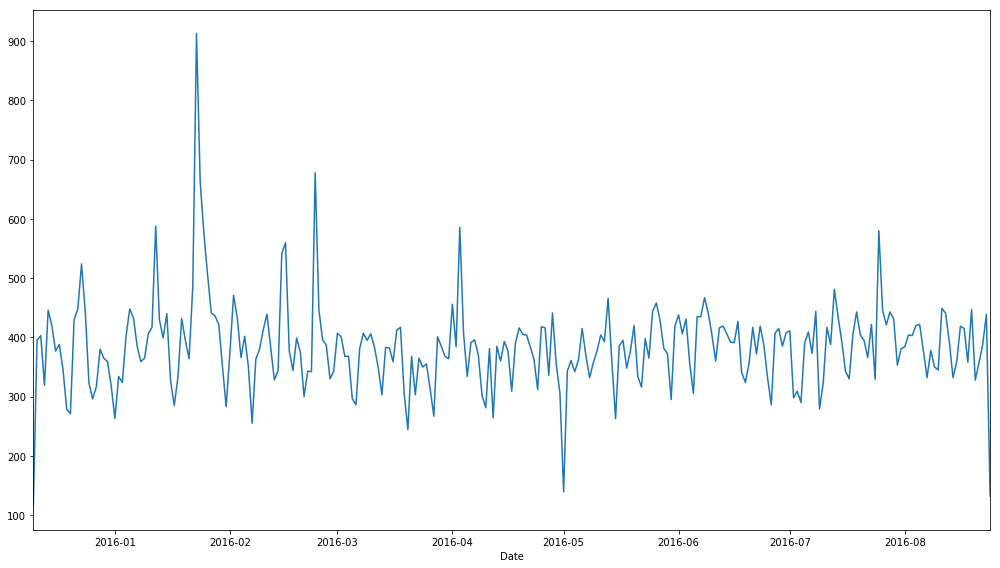

In [71]:
# Let us plot the data of calls for different date and also for different reasons
# First we need to convert the data as per date
plt.figure(figsize=(14,8))
byDate = dataset.groupby('Date').count()
byDate['twp'].plot()
plt.tight_layout()

In [72]:
# We have maximum call 2016-02 and it drops at 2016-05

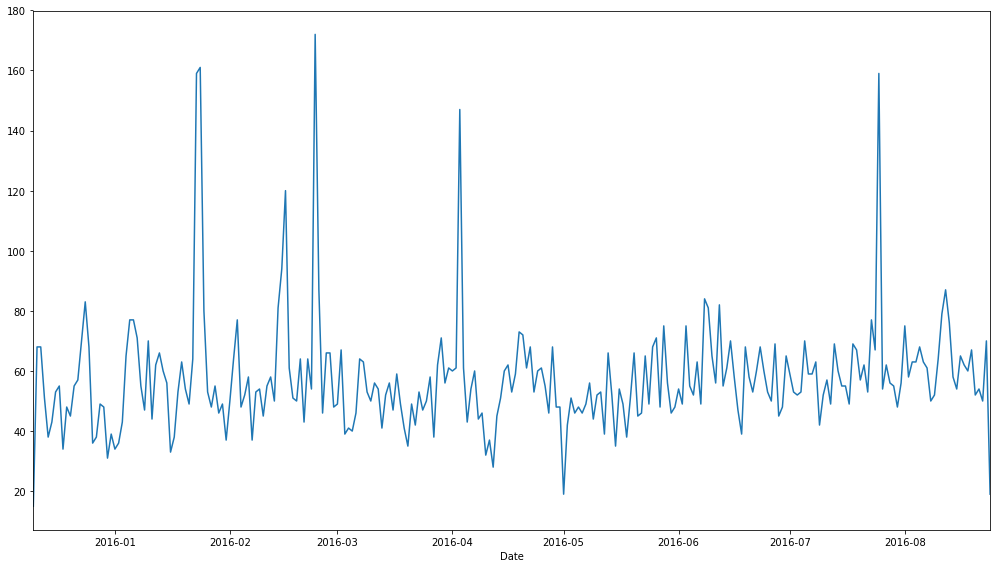

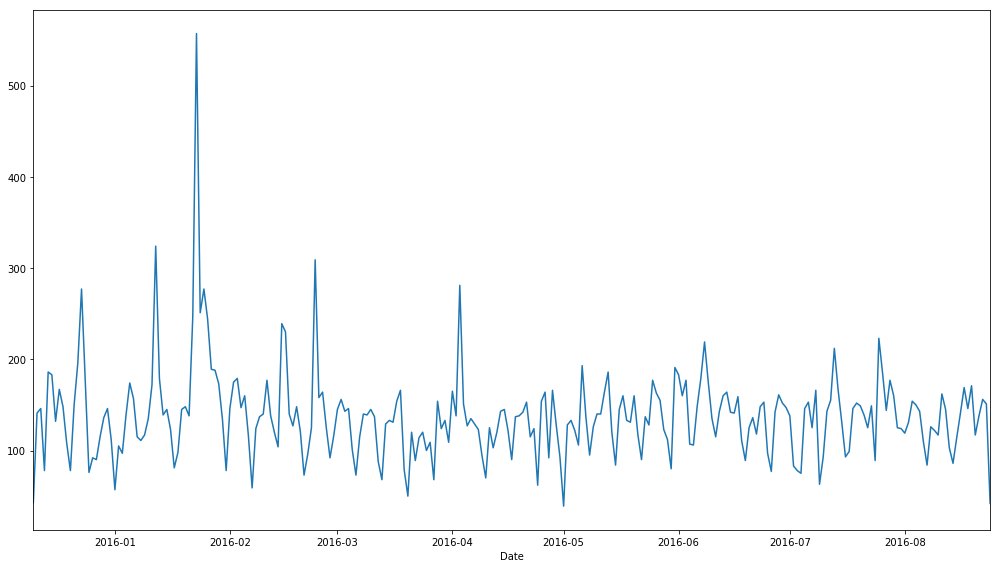

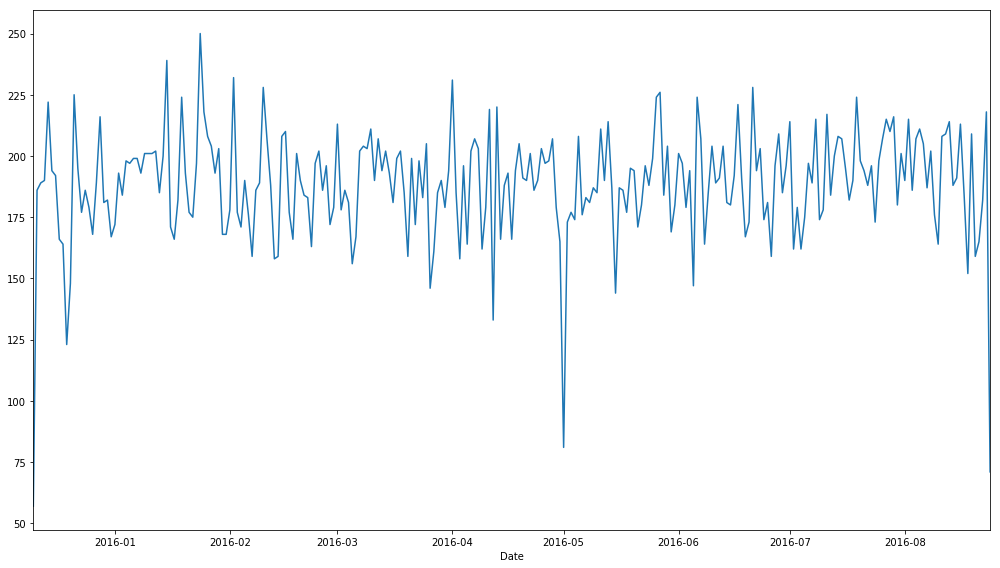

In [74]:
# Let us do the same for Different Reasons
plt.figure(figsize=(14,8))
dataset[dataset['Reasons']=='Fire'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.figure(figsize=(14,8))
dataset[dataset['Reasons']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.tight_layout()
plt.figure(figsize=(14,8))
dataset[dataset['Reasons']=='EMS'].groupby('Date').count()['twp'].plot()
plt.tight_layout()

In [75]:
# Now lets us see relationships between month-day and hour-day with respect to Reasons

In [76]:
daymonth = dataset.groupby(['Day of Week', 'Month']).count()['Reasons'].unstack()
daymonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


In [77]:
dayhour = dataset.groupby(['Day of Week', 'Hour']).count()['Reasons'].unstack()
dayhour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


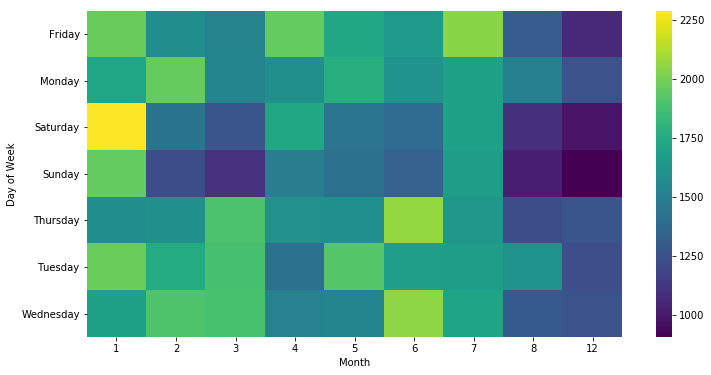

In [78]:
# Now it plotting time, so we will plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(data=daymonth, cmap='viridis')

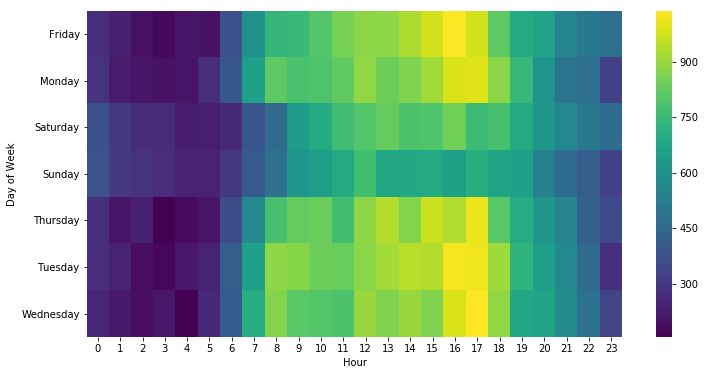

In [79]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dayhour, cmap='viridis')

#### We have maximum calls on Saturdays of January, And we get least on Sundays of December
#### The 16th hour of friday is maximum, and 3 rd hour of Friday is getting least calls

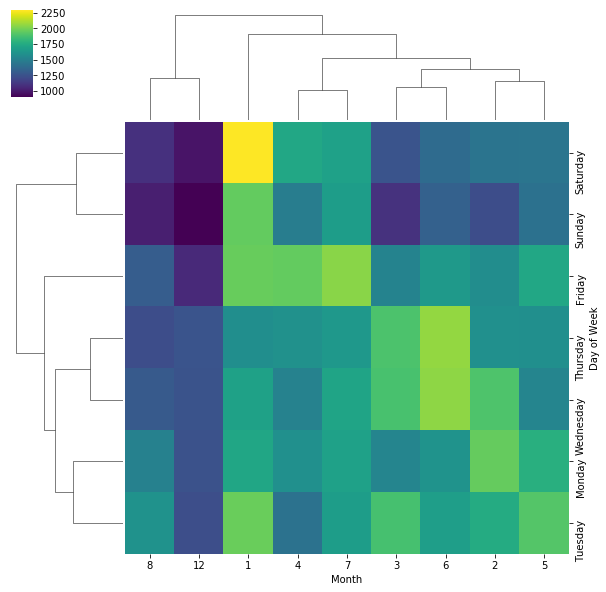

In [80]:
# Now let us plot clustermap to find appropriate cluster
plt.figure(figsize=(12,6))
sns.clustermap(data=daymonth, cmap='viridis')

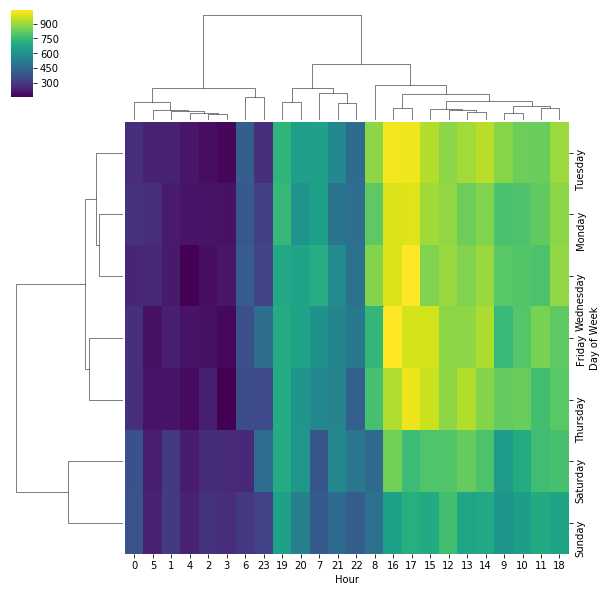

In [81]:
# Now let us plot clustermap to find appropriate cluster
plt.figure(figsize=(12,6))
sns.clustermap(data=dayhour, cmap='viridis')

# Important Insgihts from our data (serial wise)

## 1. Zip 19401 has 6949 calls, which is maximum so this area need special consideration

## 2. After zip, we get maximum calls from Lower Merion (8443), so this town is on     consideration 

## 3. We have total 112 unique titles out of 99492

## 4. With maximum complaints we have EMS>Traffic>Fire

## 5. Fridays have maximum calls overall and Tuesday have maximum traffic, this means there is reason for traffic problem that happends on tuesday

## 6. January see maximum overall calls

## 7. We don't have data of September,October, November. So we need line plot for estimation

## 8. Then we have data of Traffic,Fire and EMS with respective dates. 

## 9. Saturdays of January see maximum calls, while sundays of December are almost free

## 10. 16th and 17th are most crucial while 0-5 hours are having least calls.

## 11. We see connection of sunday-saturday, moday-tuesday, wedesday-thursday

## 12. August and December are similar and least prone to mishappenings